In [1]:
#from google.colab import files
#uploaded = files.upload()

In [96]:
import pandas as pd
import matplotlib as plt
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

In [2]:
churnData = pd.read_csv('customer_churn.csv')
churnData.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
churnData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [4]:
#type(churnData['TotalCharges'].loc[0])
type(float("   "))

ValueError: could not convert string to float: ''

In [5]:
display(churnData['TotalCharges'].value_counts())
rows_to_drop = list(churnData[churnData['TotalCharges'] == ' '].index)
churnData.drop(churnData.index[rows_to_drop],inplace=True)
display(churnData['TotalCharges'].value_counts())
churnData['TotalCharges'] = list(map(float,churnData['TotalCharges']))

20.2       11
           11
19.75       9
19.9        8
20.05       8
           ..
2162.6      1
6457.15     1
2471.6      1
1007.8      1
4013.8      1
Name: TotalCharges, Length: 6531, dtype: int64

20.2       11
19.75       9
20.05       8
19.65       8
19.9        8
           ..
2162.6      1
6457.15     1
2471.6      1
1007.8      1
4013.8      1
Name: TotalCharges, Length: 6530, dtype: int64

In [6]:
churnData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 


In [7]:
churnData['Churn'].value_counts()

No     5163
Yes    1869
Name: Churn, dtype: int64

As you can see there is a huge imbalance in the representation of the two categories 

In [8]:
5163/(5163+1869)

0.7342150170648464

In [9]:
churnData.drop(columns="customerID",inplace=True)

In [10]:
cat_cols = churnData.select_dtypes(include='object')
cat_cols.head()

,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
0,Female,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,No
1,Male,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,No
2,Male,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,Yes
3,Male,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),No
4,Female,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,Yes


One hot enconding

In [11]:
churnData['gender'] = np.where(churnData['gender'] == 'Male',1,0)
my_cols = ['Partner','Dependents','PhoneService','OnlineSecurity','OnlineBackup','DeviceProtection',
           'TechSupport','TechSupport','StreamingTV','StreamingMovies','PaperlessBilling']

for col in my_cols:
  churnData[col] = np.where(churnData[col] == 'Yes',1,0)

churnData.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,No phone service,DSL,0,1,0,0,0,0,Month-to-month,1,Electronic check,29.85,29.85,No
1,1,0,0,0,34,1,No,DSL,1,0,1,0,0,0,One year,0,Mailed check,56.95,1889.50,No
2,1,0,0,0,2,1,No,DSL,1,1,0,0,0,0,Month-to-month,1,Mailed check,53.85,108.15,Yes
3,1,0,0,0,45,0,No phone service,DSL,1,0,1,0,0,0,One year,0,Bank transfer (automatic),42.30,1840.75,No
4,0,0,0,0,2,1,No,Fiber optic,0,0,0,0,0,0,Month-to-month,1,Electronic check,70.70,151.65,Yes


In [12]:
cat = pd.get_dummies(churnData[['MultipleLines', 'InternetService', 'Contract', 'PaymentMethod']], drop_first=True)
cat.head()

,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,0,0,0,0,0,0,1,0
1,0,0,0,0,1,0,0,0,1
2,0,0,0,0,0,0,0,0,1
3,1,0,0,0,1,0,0,0,0
4,0,0,1,0,0,0,0,1,0


In [13]:
lab = churnData[['gender','Partner','Dependents','PhoneService','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','PaperlessBilling']]
num = churnData.select_dtypes(include=['float64','int64'])
X = pd.concat([num,lab,cat], axis=1, sort=False)
X.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,...,PaperlessBilling,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,0,1,0,0,1,0,0,...,1,1,0,0,0,0,0,0,1,0
1,1,0,0,0,34,1,1,0,1,0,...,0,0,0,0,0,1,0,0,0,1
2,1,0,0,0,2,1,1,1,0,0,...,1,0,0,0,0,0,0,0,0,1
3,1,0,0,0,45,0,1,0,1,0,...,0,1,0,0,0,1,0,0,0,0
4,0,0,0,0,2,1,0,0,0,0,...,1,0,0,1,0,0,0,0,1,0


In [14]:
y = pd.DataFrame(data=churnData, columns=['Churn'])
transformer = StandardScaler().fit(X)
scaled_x = transformer.transform(X)

In [15]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(scaled_x, y, test_size=0.3, random_state=100)

In [16]:
classification = LogisticRegression(random_state=0, solver='lbfgs', multi_class='ovr').fit(X_train, y_train)
y_pred = classification.predict(X_test)
print("The accuracy of the logistic_regression model is: %4.2f "% (classification.score(X_test, y_test)))

The accuracy of the logistic_regression model is: 0.80 


With this imbalance, when we tried to fit the model it still gave us an accuracy of 80%

In [20]:
y = pd.DataFrame(data=churnData, columns=['Churn'])
y['Churn'].value_counts()

No     5163
Yes    1869
Name: Churn, dtype: int64

Note: Even if we just blindly say that each prediction is **No**, we would still get an accuracy of 

In [21]:
print("The accuracy of a blind guess is: %4.2f " % (5163/(5163+1869)))

The accuracy of a blind guess is: 0.73 


In [22]:
from sklearn.metrics import cohen_kappa_score

print("The kappa of the logistic regression model is: %4.2f " %(cohen_kappa_score(y_pred,y_test)) )

The kappa of the logistic regression model is: 0.47 


# Lets increase the imbalance and see how the model works 

In [23]:
data = pd.concat([X,y], axis=1, sort=False)
data.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,...,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn
0,0,0,1,0,1,0,0,1,0,0,...,1,0,0,0,0,0,0,1,0,No
1,1,0,0,0,34,1,1,0,1,0,...,0,0,0,0,1,0,0,0,1,No
2,1,0,0,0,2,1,1,1,0,0,...,0,0,0,0,0,0,0,0,1,Yes
3,1,0,0,0,45,0,1,0,1,0,...,1,0,0,0,1,0,0,0,0,No
4,0,0,0,0,2,1,0,0,0,0,...,0,0,1,0,0,0,0,1,0,Yes


In [24]:
yes = data[data['Churn']=='Yes']
no = data[data['Churn']=='No']
yes = yes.sample(500)

In [25]:
data = pd.concat([yes,no], axis=0)
print(data['Churn'].value_counts())
data.head()

No     5163
Yes     500
Name: Churn, dtype: int64


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,...,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn
3987,0,0,0,0,11,1,0,0,0,0,...,0,1,1,0,0,0,0,1,0,Yes
2780,0,0,0,0,25,1,1,1,1,0,...,0,0,0,0,1,0,0,0,1,Yes
5541,0,0,0,0,61,1,0,0,1,0,...,0,1,1,0,0,1,0,1,0,Yes
4169,0,0,0,0,15,1,0,1,1,0,...,0,0,1,0,0,0,0,1,0,Yes
1308,1,1,0,0,16,1,0,0,0,0,...,0,1,1,0,0,0,0,1,0,Yes


In [26]:
#shuffling the data
data = data.sample(frac=1)
data['Churn'].value_counts()

No     5163
Yes     500
Name: Churn, dtype: int64

In [27]:
X = data.drop('Churn', axis=1)
X.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,...,PaperlessBilling,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
1922,1,0,1,1,25,1,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
4127,1,0,0,1,56,1,0,0,0,0,...,1,0,1,0,1,0,1,0,0,1
4061,0,0,0,0,14,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1504,0,0,0,0,18,1,0,0,0,0,...,1,0,0,1,0,0,0,0,1,0
5994,0,0,0,0,42,1,1,0,1,0,...,1,0,1,1,0,0,0,0,1,0


In [28]:
y = data['Churn']
transformer = StandardScaler().fit(X)
scaled_x = transformer.transform(X)

In [29]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(scaled_x, y, test_size=0.3, random_state=100)

In [30]:
classification = LogisticRegression(random_state=0, solver='lbfgs', multi_class='ovr').fit(X_train, y_train)
y_pred = classification.predict(X_test)
print("The accuracy of the logistic_regression model is: %4.2f "% (classification.score(X_test, y_test)))

The accuracy of the logistic_regression model is: 0.93 


In [31]:
from sklearn.metrics import cohen_kappa_score

print("The kappa of the logistic regression model is: %4.2f " %(cohen_kappa_score(y_pred,y_test)) )

The kappa of the logistic regression model is: 0.09 


In [32]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred, labels=['Yes','No']))

              precision    recall  f1-score   support

         Yes       0.75      0.05      0.09       120
          No       0.93      1.00      0.96      1579

    accuracy                           0.93      1699
   macro avg       0.84      0.52      0.53      1699
weighted avg       0.92      0.93      0.90      1699



Despite the advantage of balancing classes, these techniques also have their weaknesses (there is no free lunch). The simplest implementation of over-sampling is to duplicate random records from the minority class, which can cause overfitting. In under-sampling, the simplest technique involves removing random records from the majority class, which can cause loss of information.

In [33]:
counts = churnData['Churn'].value_counts()
yes = churnData[churnData['Churn']=='Yes'].sample(counts[0], replace=True)
no = churnData[churnData['Churn']=='No']
data = pd.concat([yes,no], axis=0)
data = data.sample(frac=1)
data['Churn'].value_counts()

No     5163
Yes    5163
Name: Churn, dtype: int64

In contrast, before we had.

In [34]:
counts = churnData['Churn'].value_counts()
counts

No     5163
Yes    1869
Name: Churn, dtype: int64

In [35]:
cat = pd.get_dummies(data[['MultipleLines', 'InternetService', 'Contract', 'PaymentMethod']], drop_first=True)
lab = data[['gender','Partner','Dependents','PhoneService','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','PaperlessBilling']]
num = data.select_dtypes(include=['float64','int64'])
X = pd.concat([num,lab,cat], axis=1, sort=False)
X.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,...,PaperlessBilling,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
188,0,0,0,0,13,1,0,0,0,0,...,0,0,0,0,1,1,0,0,1,0
5986,1,1,0,0,11,1,0,0,0,0,...,1,0,0,1,0,0,0,1,0,0
4775,0,0,1,0,24,1,0,1,1,0,...,1,0,0,1,0,0,0,1,0,0
365,1,0,0,0,5,1,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
3660,1,0,0,0,7,0,0,0,1,0,...,1,1,0,0,0,1,0,1,0,0


In [36]:
transformer = StandardScaler().fit(X)
scaled_x = transformer.transform(X)
y = data['Churn']

In [37]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(scaled_x, y, test_size=0.3, random_state=100)

In [38]:
classification = LogisticRegression(random_state=0, solver='lbfgs', multi_class='ovr').fit(X_train, y_train)
y_pred = classification.predict(X_test)
print("The accuracy of the logistic_regression model is: %4.2f "% (classification.score(X_test, y_test)))

The accuracy of the logistic_regression model is: 0.76 


In [39]:
from sklearn.metrics import cohen_kappa_score

print("The kappa of the logistic regression model is: %4.2f " %(cohen_kappa_score(y_pred,y_test)) )

The kappa of the logistic regression model is: 0.52 


In [40]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred, labels=['Yes','No']))

              precision    recall  f1-score   support

         Yes       0.75      0.81      0.78      1582
          No       0.78      0.71      0.75      1516

    accuracy                           0.76      3098
   macro avg       0.76      0.76      0.76      3098
weighted avg       0.76      0.76      0.76      3098



F1 = 2 * (Precission*Recall)/(Pprecission+Recall)

In [41]:
2* ((0.74*0.80)/(0.74+0.80))

0.7688311688311688

Other more sophisticated resampling techniques include:

Cluster the records of the majority class, and do the under-sampling by removing records from each cluster, thus seeking to preserve information. 
In over-sampling, instead of creating exact copies of the minority class records, we can introduce small variations into those copies, creating more diverse synthetic samples.

In [42]:
#pip install imblearn

In [43]:
cat = pd.get_dummies(churnData[['MultipleLines', 'InternetService', 'Contract', 'PaymentMethod']], drop_first=True)
lab = churnData[['gender','Partner','Dependents','PhoneService','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','PaperlessBilling']]
num = churnData.select_dtypes(include=['float64','int64'])
X = pd.concat([num,lab,cat], axis=1, sort=False)
X.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,...,PaperlessBilling,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,0,1,0,0,1,0,0,...,1,1,0,0,0,0,0,0,1,0
1,1,0,0,0,34,1,1,0,1,0,...,0,0,0,0,0,1,0,0,0,1
2,1,0,0,0,2,1,1,1,0,0,...,1,0,0,0,0,0,0,0,0,1
3,1,0,0,0,45,0,1,0,1,0,...,0,1,0,0,0,1,0,0,0,0
4,0,0,0,0,2,1,0,0,0,0,...,1,0,0,1,0,0,0,0,1,0


In [44]:
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler

# Downsampling
rus = RandomUnderSampler() 
transformer = StandardScaler().fit(X)
X = transformer.transform(X)
y = churnData['Churn']
X_rus, y_rus = rus.fit_sample(X, y)

In [45]:
y.value_counts()

No     5163
Yes    1869
Name: Churn, dtype: int64

In [50]:
y_rus = pd.DataFrame(data=y_rus)
y_rus['Churn'].value_counts()

No     1869
Yes    1869
Name: Churn, dtype: int64

In [51]:
transformer = StandardScaler().fit(X_rus)
X = transformer.transform(X_rus)

In [52]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y_rus, test_size=0.3, random_state=100)

In [53]:
classification = LogisticRegression(random_state=0, solver='lbfgs', multi_class='ovr').fit(X_train, y_train)
y_pred = classification.predict(X_test)
print("The accuracy of the logistic_regression model after undersampling is: %4.2f "% (classification.score(X_test, y_test)))

The accuracy of the logistic_regression model after undersampling is: 0.76 


In [54]:
from sklearn.metrics import cohen_kappa_score

print("The kappa of the logistic regression model after undersampling is: %4.2f " %(cohen_kappa_score(y_pred,y_test)) )

The kappa of the logistic regression model after undersampling is: 0.52 


In [55]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred, labels=['Yes','No']))

              precision    recall  f1-score   support

         Yes       0.73      0.80      0.77       547
          No       0.79      0.72      0.76       575

    accuracy                           0.76      1122
   macro avg       0.76      0.76      0.76      1122
weighted avg       0.76      0.76      0.76      1122



In [56]:
cat = pd.get_dummies(churnData[['MultipleLines', 'InternetService', 'Contract', 'PaymentMethod']], drop_first=True)
lab = churnData[['gender','Partner','Dependents','PhoneService','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','PaperlessBilling']]
num = churnData.select_dtypes(include=['float64','int64'])
X = pd.concat([num,lab,cat], axis=1, sort=False)
X.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,...,PaperlessBilling,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,0,1,0,0,1,0,0,...,1,1,0,0,0,0,0,0,1,0
1,1,0,0,0,34,1,1,0,1,0,...,0,0,0,0,0,1,0,0,0,1
2,1,0,0,0,2,1,1,1,0,0,...,1,0,0,0,0,0,0,0,0,1
3,1,0,0,0,45,0,1,0,1,0,...,0,1,0,0,0,1,0,0,0,0
4,0,0,0,0,2,1,0,0,0,0,...,1,0,0,1,0,0,0,0,1,0


In [57]:
ros = RandomOverSampler()
transformer = StandardScaler().fit(X)
X = transformer.transform(X)
y = churnData['Churn']
X_ros, y_ros = ros.fit_sample(X, y)

In [58]:
y.value_counts()

No     5163
Yes    1869
Name: Churn, dtype: int64

In [61]:
y_ros = pd.DataFrame(data=y_ros)
y_ros['Churn'].value_counts()

No     5163
Yes    5163
Name: Churn, dtype: int64

In [62]:
transformer = StandardScaler().fit(X_ros)
X = transformer.transform(X_ros)

In [63]:
classification = LogisticRegression(random_state=0, solver='lbfgs', multi_class='ovr').fit(X_train, y_train)
y_pred = classification.predict(X_test)
print("The accuracy of the logistic_regression model after oversampling is: %4.2f "% (classification.score(X_test, y_test)))

The accuracy of the logistic_regression model after oversampling is: 0.76 


In [64]:
from sklearn.metrics import cohen_kappa_score

print("The kappa of the logistic regression model after undersampling is: %4.2f " %(cohen_kappa_score(y_pred,y_test)) )

The kappa of the logistic regression model after undersampling is: 0.52 


In [88]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred, labels=['Yes','No']))

              precision    recall  f1-score   support

         Yes       0.73      0.80      0.77       547
          No       0.79      0.72      0.76       575

    accuracy                           0.76      1122
   macro avg       0.76      0.76      0.76      1122
weighted avg       0.76      0.76      0.76      1122



Cohen Kappa score 0.5248462277827299


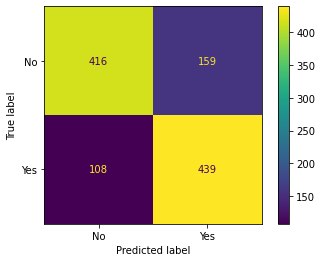

In [98]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
confusion_matrix(y_test, y_pred)
plot_confusion_matrix(classification, X_test, y_test)  # doctest: +SKIP
# doctest: +SKIP

from sklearn.metrics import cohen_kappa_score
print('Cohen Kappa score',cohen_kappa_score(y_test, y_pred))

### Synthetic Minority Oversampling TEchnique (SMOTE)

In [100]:
cat = pd.get_dummies(churnData[['MultipleLines', 'InternetService', 'Contract', 'PaymentMethod']], drop_first=True)
lab = churnData[['gender','Partner','Dependents','PhoneService','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','PaperlessBilling']]
num = churnData.select_dtypes(include=['float64','int64'])
X = pd.concat([num,lab,cat], axis=1, sort=False)
X.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,...,PaperlessBilling,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,0,1,0,0,1,0,0,...,1,1,0,0,0,0,0,0,1,0
1,1,0,0,0,34,1,1,0,1,0,...,0,0,0,0,0,1,0,0,0,1
2,1,0,0,0,2,1,1,1,0,0,...,1,0,0,0,0,0,0,0,0,1
3,1,0,0,0,45,0,1,0,1,0,...,0,1,0,0,0,1,0,0,0,0
4,0,0,0,0,2,1,0,0,0,0,...,1,0,0,1,0,0,0,0,1,0


In [101]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()

transformer = StandardScaler().fit(X)
X = transformer.transform(X)
y = churnData['Churn']
X_sm, y_sm = smote.fit_sample(X, y)
y_sm = pd.DataFrame(data=y_sm)
y_sm['Churn'].value_counts()

Hello    4438
No       4438
Yes      4438
Name: Churn, dtype: int64

### UnderSampling using TomekLinks 

Tomek links are pairs of very close instances, but of opposite classes. Removing the instances of the majority class of each pair increases the space between the two classes, facilitating the classification process.

In [77]:
from imblearn.under_sampling import TomekLinks

tl = TomekLinks('majority')
X_tl, y_tl = tl.fit_sample(X, y)
y_tl = pd.DataFrame(data=y_tl)
y_tl['Churn'].value_counts()

No       3704
Yes      1594
Hello    1000
Name: Churn, dtype: int64

In [79]:
X_tl2, y_tl2 = tl.fit_sample(X_tl, y_tl)
y_tl2 = pd.DataFrame(data=y_tl2)
y_tl2['Churn'].value_counts()

No       3491
Yes      1594
Hello    1000
Name: Churn, dtype: int64

In [ ]:
# It does not make the two classes equal but only removes the points from the majority 
# class that are close to other poitns in minority class

In [68]:
# Similar way it works for multi label classification models 
# But it can be a little tricky 

In [80]:
transformer = StandardScaler().fit(X)
X = transformer.transform(X)
y = churnData['Churn']

In [82]:
y[6000:7000] = 'Hello'
y.value_counts()

No       4438
Yes      1594
Hello    1000
Name: Churn, dtype: int64

In [85]:
tl = TomekLinks('majority')
X_tl, y_tl = tl.fit_sample(X, y)
y_tl = pd.DataFrame(data=y_tl)
y_tl['Churn'].value_counts()

No       3704
Yes      1594
Hello    1000
Name: Churn, dtype: int64

In [87]:
X_sm, y_sm = smote.fit_sample(X, y)
y_sm = pd.DataFrame(data=y_sm)
y_sm['Churn'].value_counts()

Hello    4438
No       4438
Yes      4438
Name: Churn, dtype: int64